Ce notebook permet de visionner en détail la couche limite dans la CEPA lorsque le débit d'alimentation est de 2000L/h à 2000g.

<div>
<img src="front.png" width="600"/>
</div>

Comme on peut déjà l'observer sur la tranche il y a bien une couche limite avec des zones à forte vitesse axiale près des pales.
    Relevons des profils de vitesse à $(x=0; z=0.01)$, $(x=0; z=0.03)$, $(x=0; z=0.05)$, $(x=0; z=0.07)$ et $(x=0; z=0.1)$. La couche limite est une fonction de $(z)$, son épaisseur mais aussi la vitesse axial qui y réside ne sont pas indépendants de $(z)$.


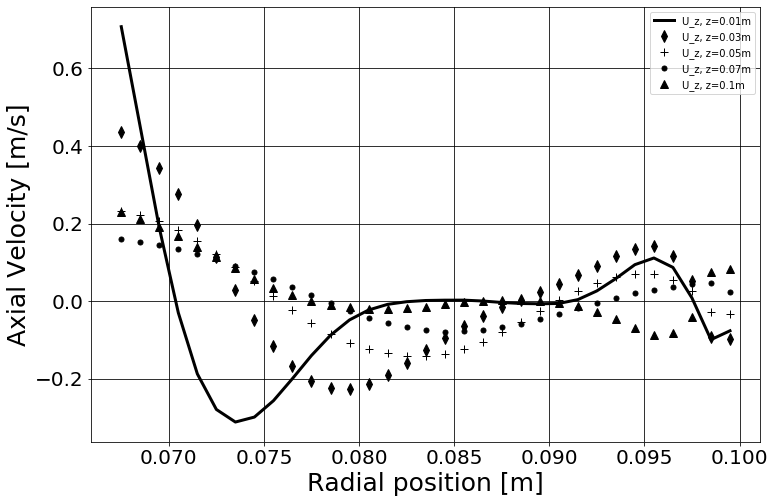

In [4]:
import scipy.optimize
import numpy as np
from numpy import genfromtxt
from scipy.stats import halfnorm, truncnorm
import matplotlib.pyplot as plt
import matplotlib     

matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)

myDataz01 = genfromtxt('line_U_z01.xy')
myDataz03 = genfromtxt('line_U_z03.xy')
myDataz05 = genfromtxt('line_U_z05.xy')
myDataz07 = genfromtxt('line_U_z07.xy')
myDataz1 = genfromtxt('line_U_z1.xy')


r01 = np.sqrt(myDataz01[:,0]**2 + myDataz01[:,1]**2)
r03 = np.sqrt(myDataz03[:,0]**2 + myDataz03[:,1]**2)
r05 = np.sqrt(myDataz05[:,0]**2 + myDataz05[:,1]**2)
r07 = np.sqrt(myDataz07[:,0]**2 + myDataz07[:,1]**2)
r1 = np.sqrt(myDataz1[:,0]**2 + myDataz1[:,1]**2)

    
plt.figure(figsize=(12,8))

plt.plot(r01, myDataz01[:,5], 'k', label='U_z, z=0.01m', linewidth=3.0)
plt.plot(r03, myDataz03[:,5], 'dk', label='U_z, z=0.03m', linewidth=3.0, markersize=8)
plt.plot(r05, myDataz05[:,5], '+k', label='U_z, z=0.05m', linewidth=1.0, markersize=8)
plt.plot(r07, myDataz07[:,5], 'ok', label='U_z, z=0.07m', linewidth=1.0, markersize=5)
plt.plot(r1, myDataz1[:,5], '^k', label='U_z, z=0.1m', linewidth=1.0, markersize=8)


plt.grid(b=True, which='major', color='k', linestyle='-')
plt.grid(b=True, which='minor', color='k', linestyle='--')
plt.xlabel('Radial position [m]', fontsize=25)
plt.ylabel('Axial Velocity [m/s]', fontsize=25)
plt.legend()  
plt.show()

<div>
<img src="image2993.png" width="600"/>
</div>

On voi aussi qu'à l'approche des pales la couche limite est aussi modifiée. Faisons une extraction de profil orthoridial à $r= 0,069$ et aux $z$ précédents pour mieux voir l'influence des pales.

In [12]:
radius = 0.069
angles = np.linspace(0, 360, 180)
anglesRad = angles * np.pi / 180
x = radius * np.cos(anglesRad)
y = radius * np.sin(anglesRad)


def saveProbeOrthoLine(name, x, y, z):
    pulldata=open(name,'w')
    pulldata.close()
    pulldata=open(name,'a')

    for i in range(0,len(x)) :
        pulldata.write('(' + str(x[i])+' '+str(y[i])+' '+str(z)+')'+'\n')
    pulldata.close()
    
saveProbeOrthoLine('ortho_z01', x, y, 0.01)
saveProbeOrthoLine('ortho_z03', x, y, 0.03)
saveProbeOrthoLine('ortho_z05', x, y, 0.05)
saveProbeOrthoLine('ortho_z07', x, y, 0.07)
saveProbeOrthoLine('ortho_z1', x, y, 0.1)

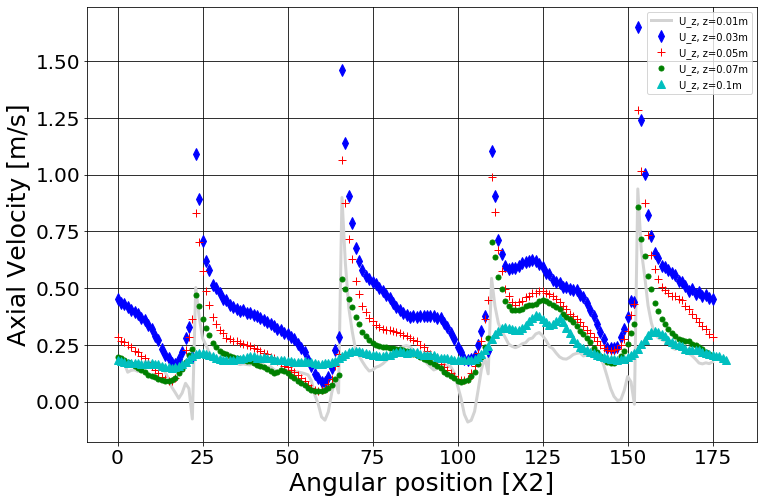

In [25]:
mylineOrthoz01 = genfromtxt('lineOrtho_z01')
mylineOrthoz03 = genfromtxt('lineOrtho_z03')
mylineOrthoz05 = genfromtxt('lineOrtho_z05')
mylineOrthoz07 = genfromtxt('lineOrtho_z07')
mylineOrthoz1 = genfromtxt('lineOrtho_z1')


plt.figure(figsize=(12,8))

plt.plot(mylineOrthoz01[:,2], color='lightgray', label='U_z, z=0.01m', linewidth=3.0, markersize=8)
plt.plot(mylineOrthoz03[:,2], 'db', label='U_z, z=0.03m', linewidth=3.0, markersize=8)
plt.plot(mylineOrthoz05[:,2], '+r', label='U_z, z=0.05m', linewidth=3.0, markersize=8)
plt.plot(mylineOrthoz07[:,2], 'og', label='U_z, z=0.07m', linewidth=3.0, markersize=5)
plt.plot(mylineOrthoz1[:,2], '^c', label='U_z, z=0.1m', linewidth=3.0, markersize=8)

plt.grid(b=True, which='major', color='k', linestyle='-')
plt.grid(b=True, which='minor', color='k', linestyle='--')
plt.xlabel('Angular position [X2]', fontsize=25)
plt.ylabel('Axial Velocity [m/s]', fontsize=25)
plt.legend()  
plt.show()

$U_{z}$ est une fonction périodique de la position angulaire. L'influence des pales se caractérise par des zones de très forts gradients de vitesse dans leur voisinage immédiat. La périodicité s'estompe au fur et à mesure que l'on s'approche du débordement. De même que ce qui a été observé précédemment, la composante axiale de vitesse perd aussi en intensité à mesure que l'on monte dans l'anneau liquide.